# Exploring the Data

In [55]:
# Import packages to use dataframes
import pandas as pd
import numpy as np

# import matplotlib for visualisations
import matplotlib.pyplot as plt
%matplotlib inline

#Import the data to a dataframe and make the cities the indexes
df = pd.read_csv("UsArrests.csv",index_col='City')
# Show first five rows
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


In [56]:
# Check the amount if data points and variables are within the data
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 4


From the data it can be seen that there are 50 cities in the dataframe and each city has 4 variables: Murder, Assault, Urban population and rape.

The next step in this data exploration is to summarise the statistical properties of the data

In [57]:
#To set the decimal precision to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function gives us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


From the statistical summary it can be seen that Assault has the highest mean and standard deviation. This makes sense since assault is generally defined as "an intentional act that puts another person in reasonable apprehension of imminent harmful or offensive contact. No physical injury is required, but the actor must have intended to cause a harmful or offensive contact with the victim and the victim must have thereby been put in immediate apprehension of such a contact" as by Cornell University. This is a broad definition and since physical injury is not required then in the many more cases can be considered assualt especially if the victim was not raped or murdered within the confines of this set of data. Additionally the UrbanPop vriable is a percentage variable while all other variables are ratios.

The next step in the data exploration is to check for missing values in the dataframe.

In [58]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [59]:
# Check the data types of each column to see if there are any strings between the numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


From checking for missing values and checking the data types of the data it can be seen that there are no missing data points or any unwanted strings in the data.

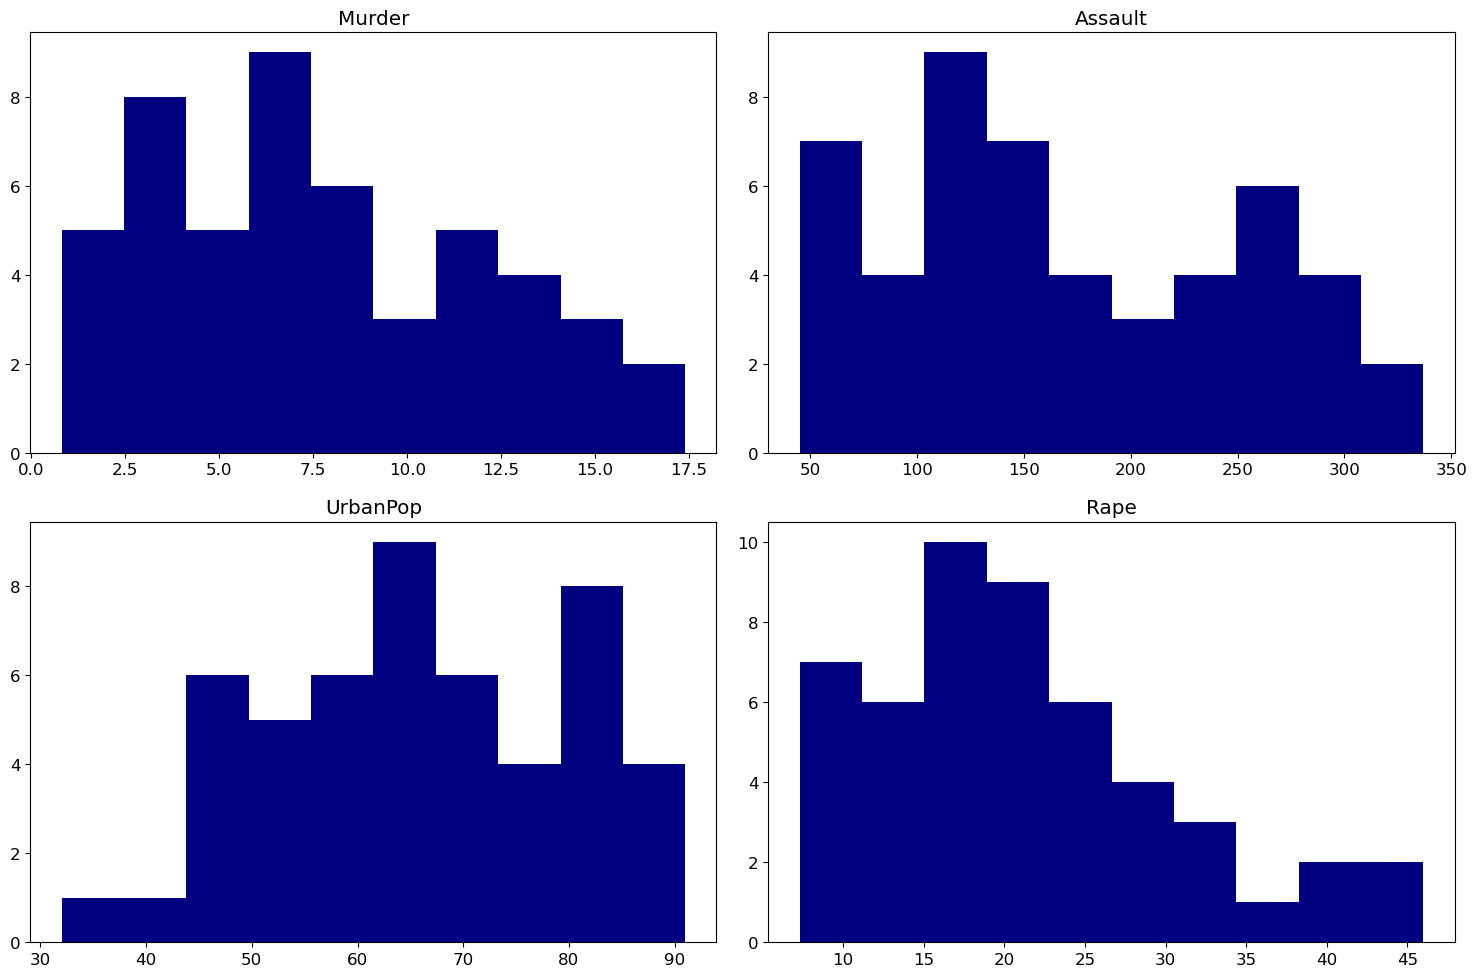

In [60]:
# Plot histograms of the variables
histograms = df.hist(color='navy', grid=False, figsize=(15, 10))
plt.rcParams['font.size'] = '14'
plt.tight_layout()

# Display the plots
plt.show()

From the histogram plots on the 4 variables it can be seen that Murder, Assault and Rape are skewed to the left while UrbanPop is more normally distributed.

In [61]:
# Create summary table of the sumamrised stats and missing values for each variable
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary

,missing,mean,std,min,max
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


# Correlation Analysis

In [62]:
# Assign the index values of the dataframe to a varibale
# Make correlation between the variables
cities = df.index
corr_df = df.corr()
labels = df.columns
correlations = df.corr()

<AxesSubplot:>

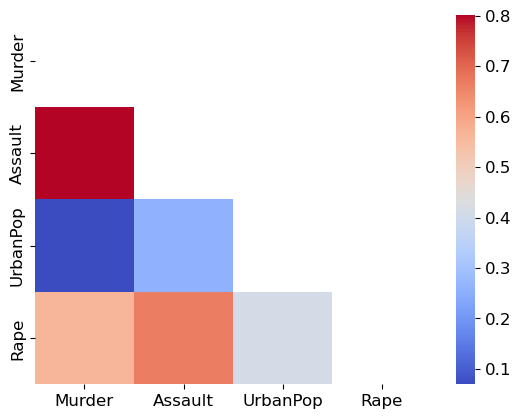

In [63]:
# Import the seaborn pickage to generate the heatmap
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool_)
plt.rcParams['font.size'] = '12'
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

In this heatmap all strongly correlated variables (indicated by very dark blue (negative) or red(positive)) are linearly correlated.

From this heatmap it can be seen that murder has a strong correlation with assuault. This is because murder involves assault of a person in many cases. Murder also has a strong negative correlation with the Urban population percentage which indicates that murders are higher the more people live in rural areas or areas outside the city.

The heatmap shows that assault is positively correlated with rape which makes sense since rape is a voilent crime and physical harm is common.

For the Urban population percentage it can be seen from the heatmap that rape is not correlated well with it which would mean that rape is apporximately the same inside and outside the city.

With these strong correlations Principle Component Analysis can be conducted on the data to reduce variables.

# Principle Component Analysis

In [64]:
# Import the PCA package from sklearn
from sklearn.decomposition import PCA #run again if it does not converge the first time

# Adjust to 2 decimal places
np.set_printoptions(precision=2)

# Assign values to a variable and remove single-dimensional entries from the shape of the dataframe
X = df.values.squeeze()

# Assignt he PCA model to a variable
pca = PCA()

# Transform the data assigned to X
X_trans = pca.fit_transform(X)

# Assign the transformed values to a new dataframe and display first 5 rows
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [65]:
# Get the standard deviations for each principle component
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [66]:
# Get the variance for each principle component
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [67]:
# Display the cumulative proportion of the variances for each principle component
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [68]:
# Define a function to make a biplot that will plot each projected observation that was transformed from the original data
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0] # Select all values from the first column
    ys = score[:,1] # Select all values from the second column
    n = coeff.shape[0] # Determine the shape of the dataframe given
    
    # Scale the values of x and y (first and second columns)
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    
    
    # Generate a scatterplot with he adjust x and y values using the scaler
    ax.scatter(xs * scalex,ys * scaley,s=5)

    # Loop through all the values and plot the index name with the corresponding x and y values
    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))
    
    # Loop as many times as the shape of the provided dataframe and draw an arrow from the 0 point
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from Hyperiondev L3T12_example_plots which adapted from 
    # https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

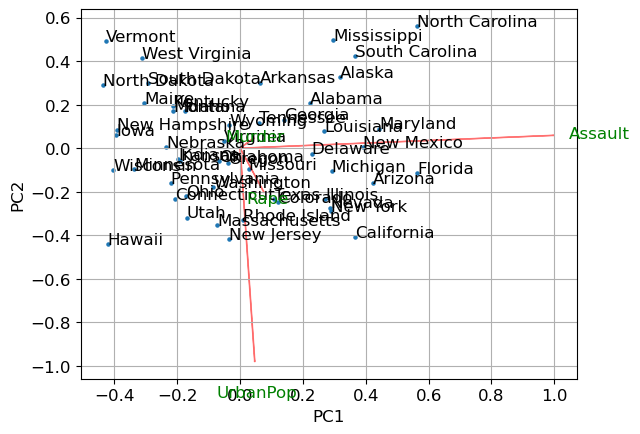

In [69]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

To investigate these effects further the importance of each feature needs to be dtermined.

In [70]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see 3 decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


From the biplot the first principle component (PC1) is dominated by Assualt. However, it can be seen that there is a dispersion between cities in regards to assualt cases where cities such as North Carolina and Florida have the highest assault cases while Vermont and North Dakota and Hawaii have the lowest.

For the second principle component (PC2) it can be seen that the component is dominated by UrbanPop, however this can be attributed to a scaling issue for the principle components. This is confirmed by looking at the proportion of variance for the second component (2.78e-02) while for the first component the value is 0.96.

The next step will be to scale the data and redo the biplot. This is to prevent variables from swamping the others.

# Standardised data

In [71]:
# Import the StandardScaler package
from sklearn.preprocessing import StandardScaler

# Apply the standardscaler to the values saved to variable X
X_std = StandardScaler().fit_transform(X)

# Conduct PCA on the the satndardised values
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

# Make a standardised PCA fitted dataframe of the transformed values
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


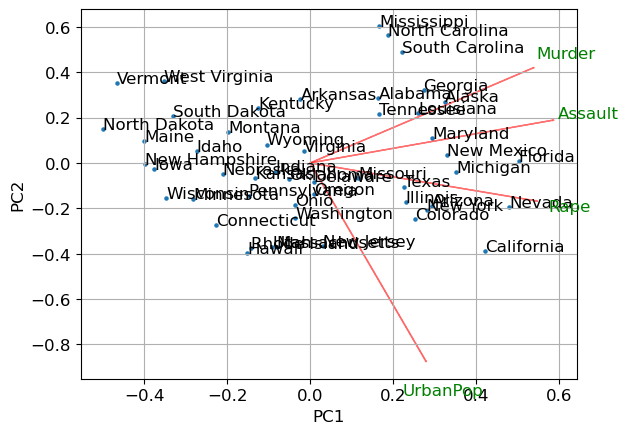

In [72]:
# Use the biplot function again with the standardised data
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

From the new biplot it can be seen that the swamping effect caused by previous data has been removed and more variables are being utilised to explain the variance. Where in this case Assault and UrbanPop are still significant, however the effect of murder and rape have become more significant. As a result the feature importance needs ot be checked again

In [73]:
# Feature importance on the standardised data
pc1 = abs( std_pca.components_[0] )
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


With the standardised data it can be seen that for PC1 that Murder, Assault and Rape all have a positive loading. This agrees with he previously generated heatmap for the variables and the feature importance for PC1 for each varibale is very much the same. This would indicated that PC1 has a focus on the crimes committed.

Cities such as Mississippi, North Carolina and South Carolina will have higher cases of murder while Maryland, New Mexico and Michigan will have more cases of Assualt. Lastly Nevada and California both show more cases of rape. However, overall all of these cities have higher levels of these crimes compared to other cities such as North Dakota and Vermont. However, a split can be observed where some cities have significantly more cases of these crimes compared to others.

From the standardised data biplot it can be seen that only Urbanpop has an effect on PC2 where it has a negative loading. This again agress with the indirect correlation observed in the heatmap. However, the biplot does indicate that all of the cities have greater urban populations rather than rural/farm populations.Cities such as Hawaii, California and New Jersey all have lower urban populations while North Carolina, South Carolina and Mississippi all have more people living in the urban areas.

Next the correct amount of principile components needs to be chosen that will allow for a significant description of the variation in the data. To do this a Scree plot and Cumulative Explained Variance plot will be drawn.

Text(0.5, 1.0, 'Cumulative Explained Variance')

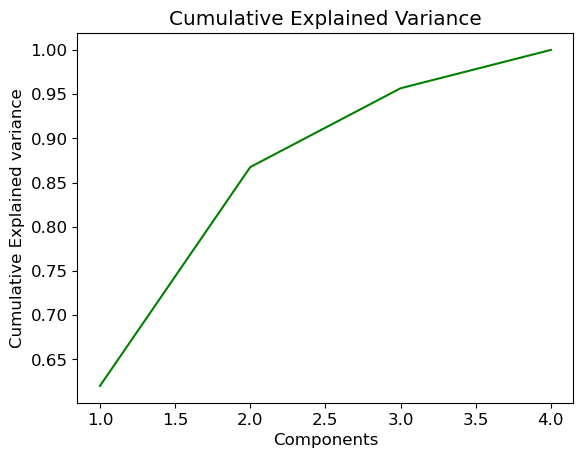

In [74]:
# Cumulative variance plot
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Components')

# Plot the amount of variables on the x-axis and the sum of the explained variance ratio on the y-axis
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='green')
plt.title("Cumulative Explained Variance")

[0.62 0.25 0.09 0.04]


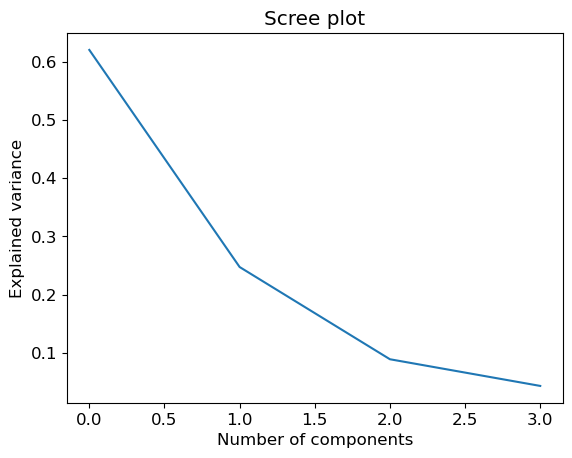

In [75]:
# Scree plot
# Plot the standardise PCA variance ratios for each component
print(std_pca.explained_variance_ratio_)
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title("Scree plot")
plt.show()

In [76]:
# Create a new PCA dataframe for the appropriate number of PCA components determined from the plots
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


From both the Cumulative explained variance plot and the Scree plot it can bee seen that the number of principle components that explain a significant amount of the variance is 3 components. As such the components will go from 4 to 3.

Next step will be is to apply unsupervised machine learning on the data through clustering.

# Clustering the data
## Hierarchical Clustering

The first type of lcustering that will be done is hierarchical clustering since the number of cluster do not need to be specified first. The number can be provided after doing the clustering for the first time. The distance that will be used will be Euclidian distance due being the most common measurement for distance.

To determine the method to be used to measure distance between clusters the dendrograms for single, average and complete linkages will be drawn.

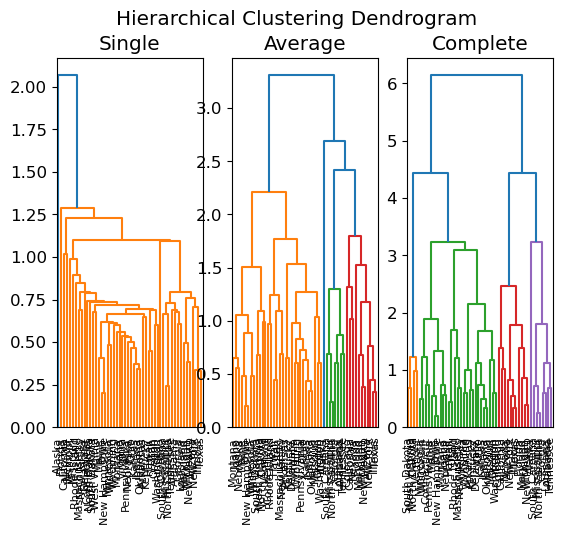

In [77]:
# Import the packages to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create a figure for all 3 plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')

# First plot is for the single linkage
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single', metric='euclidean'), labels=pca_df.index, ax=ax1)

# Second plot is for the average linkage
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average', metric='euclidean'), labels=pca_df.index, ax=ax2)

# Third plot is for the complete linkage
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete', metric='euclidean'), labels=pca_df.index, ax=ax3)
plt.show()

From the dendograms it ws decided to go with complete linkage due to the better dispersion of the clusters and will be used for the rest of this analysis. The complete dendrogram with complete linkage will look as follows.

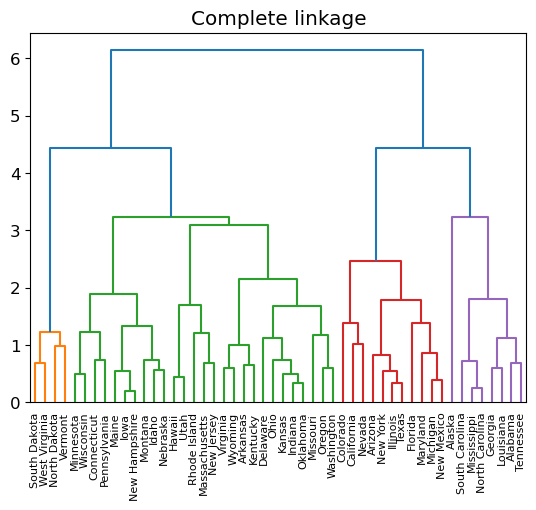

In [78]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete', metric = 'euclidean'), labels=pca_df.index)
plt.show()

For the hierarchical clustering it can be seen that the number of clusters is 4 (k=4). The clusters are of size 4, 27, 11 and 8. From the Dendrograph the first cluster which is the orange cluster contains the cities that are the cities with the lowest arrests per 100 000 residents which indicates these cities have the lowest amount crime.

The next cluster is the green cluster which contains the majority of cities where most cities have the average amount of arrests. These cities can be considered average level crime areas.

The red cluster contains the cities with above average arrests. These cities can be considered high crime cities.

Within the final purple cluster at the branch just under height 1 there are 3 cities: South Carolina, Mississppi and North Carolina. These cities were expected to form a cluster due to their higher urban population compared to he other cities. The overall cluster can be considered extreme crime cities which have the most cases of assult and murder due to their higher number of people living in the urban areas. 

# K-means clustering

The next type of clustering to be conducted on the data is the commonly used k-mean clustering. This method is considered to be fast and effecient and scales well with large datasets. This method does have drawbacks where it is not robust regarding noisy data and outliers and is not suitable for clusters that will have non-convex shapes and k needs to be specified in advance.

Text(0, 0.5, 'Dim 1')

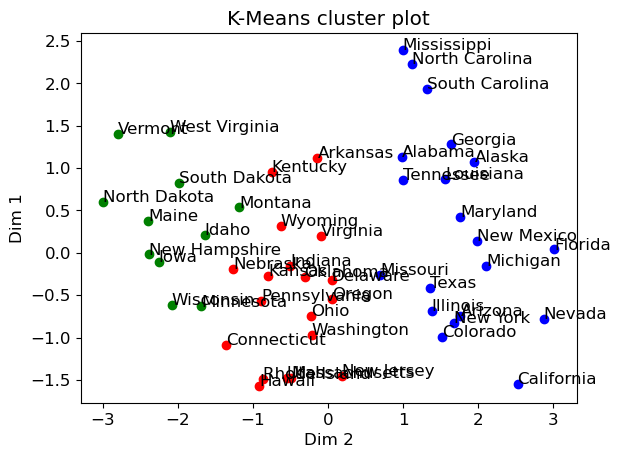

In [79]:
from sklearn.cluster import KMeans

# Extract the first two components from the standardised x values
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3 # Value was chosen as a common value
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot the clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

From the k-means cluster where k=3 it can be seen that the cities have been clustered based on levels of arrests. This indicates cities that the k-means clustering has determined to be cities with low, medium and high arrests. In this case the population of the city does not play a role in the decision of clustering for k-means clustering. However since the dendrograms indicated k = 4 the next step is to see what the clsutering will be when k =4.

Text(0, 0.5, 'Dim 1')

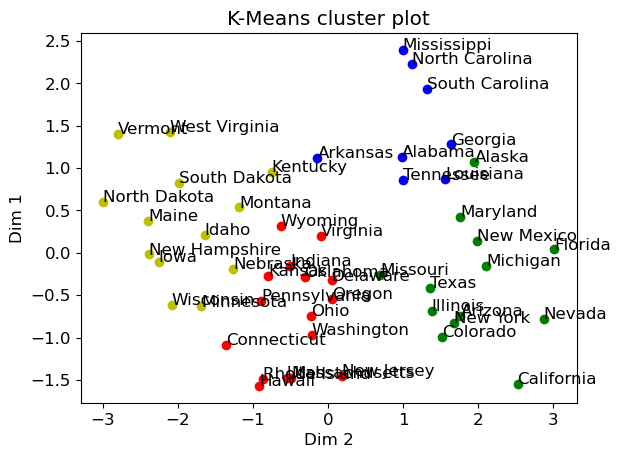

In [80]:
# Extract the first two components from the standardised x values
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=4 # Value was chosen based on dendrogram clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot the clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

With k=4 it can be seen that the Ubranpop data is taken  more into consideration. Similarly tot he hierarchical clustering the data is clustered into 4 groups: Medium urban population with low arrests (yellow), medium urban population with high arrests (green), high urban population with high arrests (blue) and low urban population with low arrests (red).

It can be seen that there is a slight difference between hierarchical and k-means clustering where k-means clustering clustered more based on the arrests and hierarchical clustered more based on the urban population.